In [495]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [496]:
df = pd.read_csv('googleplaystore.csv')

In [497]:
df_noduplicates = df.drop_duplicates()

In [498]:
df_noduplicates.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [499]:
df_noduplicates.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [500]:
df1 = df_noduplicates.loc[df_noduplicates['Type']=='Paid']

In [501]:
final_df = df1.drop(df1.loc[df1['Installs']=='Free'].index)
final_df = df1.drop(final_df.loc[df1['Reviews']=='2375336'].index)
final_df = final_df.reset_index()
final_df = final_df.drop(columns='index')

#### modfiyng the installs and Price columns

In [502]:


#final_df = final_df.drop(final_df['in'])
special_characters=[',','+','$','M','k']
shapes = final_df.shape
lengths = shapes[0]
type(lengths)
for i in range(0,lengths):
    for a in special_characters:
        final_df.loc[i,'Installs'] = final_df.loc[i,'Installs'].replace(a,"")
        final_df.loc[i,'Price'] = final_df.loc[i,'Price'].replace(a,"")
        final_df.loc[i,'Size'] = final_df.loc[i,'Size'].replace(a,"")
    final_df.loc[i,'Installs'] = float(final_df.loc[i,'Installs']) 
    final_df.loc[i,'Price'] = float(final_df.loc[i,'Price']) 

In [503]:
final_df['Size'] = final_df['Size'].replace('Varies with device',0)

In [504]:
final_df = final_df.astype({'Installs':'float','Price':'float','Size':'float'})
#final_df = final_df.astype({'Installs':'float','Price':'float','Size':'float'})

In [505]:
final_df['Revenue'] = final_df['Installs'] * final_df['Price']


In [510]:
final_df = final_df.round(decimals = 1)

In [511]:
final_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Revenue
0,TurboScan: scan documents and receipts in PDF,BUSINESS,4.700,11442,6.800,100000.000,Paid,5.000,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up,499000.000
1,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.800,10295,39.000,100000.000,Paid,5.000,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up,499000.000
2,Puffin Browser Pro,COMMUNICATION,4.000,18247,0.000,100000.000,Paid,4.000,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up,399000.000
3,"Moco+ - Chat, Meet People",DATING,4.200,1545,0.000,10000.000,Paid,4.000,Mature 17+,Dating,"June 19, 2018",2.6.139,4.1 and up,39900.000
4,Calculator,DATING,2.600,57,6.200,1000.000,Paid,7.000,Everyone,Dating,"October 25, 2017",1.1.6,4.0 and up,6990.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,FP VoiceBot,FAMILY,NaN,17,157.000,100.000,Paid,1.000,Mature 17+,Entertainment,"November 25, 2015",1.2,2.1 and up,99.000
760,Fast Tract Diet,HEALTH_AND_FITNESS,4.400,35,2.400,1000.000,Paid,8.000,Everyone,Health & Fitness,"August 8, 2018",1.9.3,4.2 and up,7990.000
761,Trine 2: Complete Story,GAME,3.800,252,11.000,10000.000,Paid,17.000,Teen,Action,"February 27, 2015",2.22,5.0 and up,169900.000
762,"sugar, sugar",FAMILY,4.200,1405,9.500,10000.000,Paid,1.200,Everyone,Puzzle,"June 5, 2018",2.7,2.3 and up,12000.000


### Top apps by revenues

#### Top Revenue from apps

In [512]:
Top_apps_by_revenues = final_df.sort_values(by='Revenue',ascending=False).reset_index().drop(columns='index')

In [513]:
Top_apps_by_revenues.loc[Top_apps_by_revenues['App']=='Minecraft']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Revenue
0,Minecraft,FAMILY,4.500,2376564,0.000,10000000.000,Paid,7.000,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device,69900000.000


In [514]:
Top_apps_by_revenues = Top_apps_by_revenues[['App','Revenue']].head(10)

In [515]:
Top_apps_by_revenues

,App,Revenue
0,Minecraft,69900000.000
1,I am rich,39999000.000
2,I Am Rich Premium,19999500.000
3,Hitman Sniper,9900000.000
4,Grand Theft Auto: San Andreas,6990000.000
5,Sleep as Android Unlock,5990000.000
6,Facetune - For Free,5990000.000
7,DraStic DS Emulator,4990000.000
8,I'm Rich - Trump Edition,4000000.000
9,I am Rich Plus,3999900.000


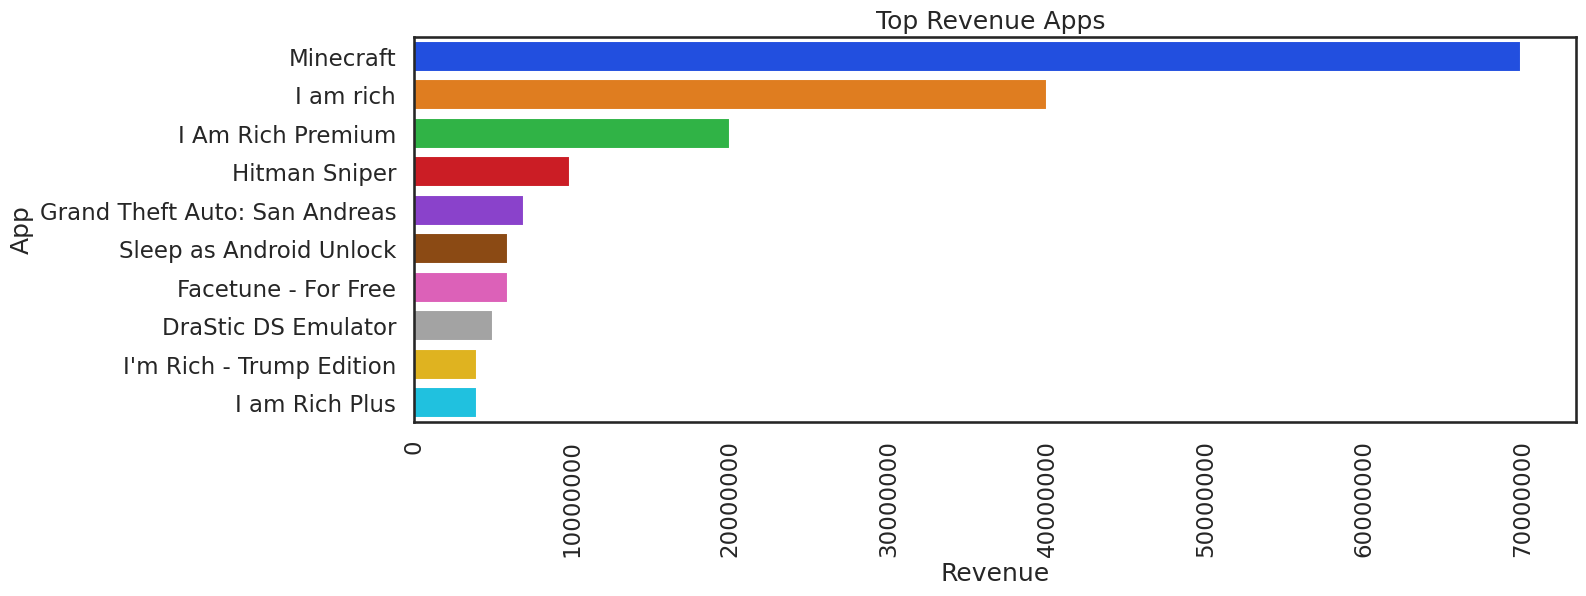

In [516]:
#pd.set_option('display.float_format', lambda x: '%.3f' % x)
plt.figure(figsize=(15,5))
sns.set_theme(style="white", context="talk")
sns.barplot(data=Top_apps_by_revenues ,y=Top_apps_by_revenues['App'], x=Top_apps_by_revenues['Revenue'] ,palette='bright')
plt.title('Top Revenue APPs '.title())
plt.xticks(rotation=90)
#plot.ticklabel_format(style='plain')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

#### Looking at reveues beeing generated by most apps

In [517]:
Apps_per_revenue =final_df.groupby('Revenue')['App'].count().to_frame().sort_values(by='App',ascending=False).head(10)

In [518]:
Apps_per_revenue

,App
Revenue,
29900.000,27
990.000,25
299000.000,24
9.900,24
99.000,22
2990.000,16
9900.000,15
19900.000,15
1990.000,14


In [523]:
#final_df.loc[final_df['Revenue']==9.9]

In [536]:
Apps_per_revenue2 =final_df.groupby('Revenue')['App'].count().to_frame().sort_values(by='App',ascending=False)

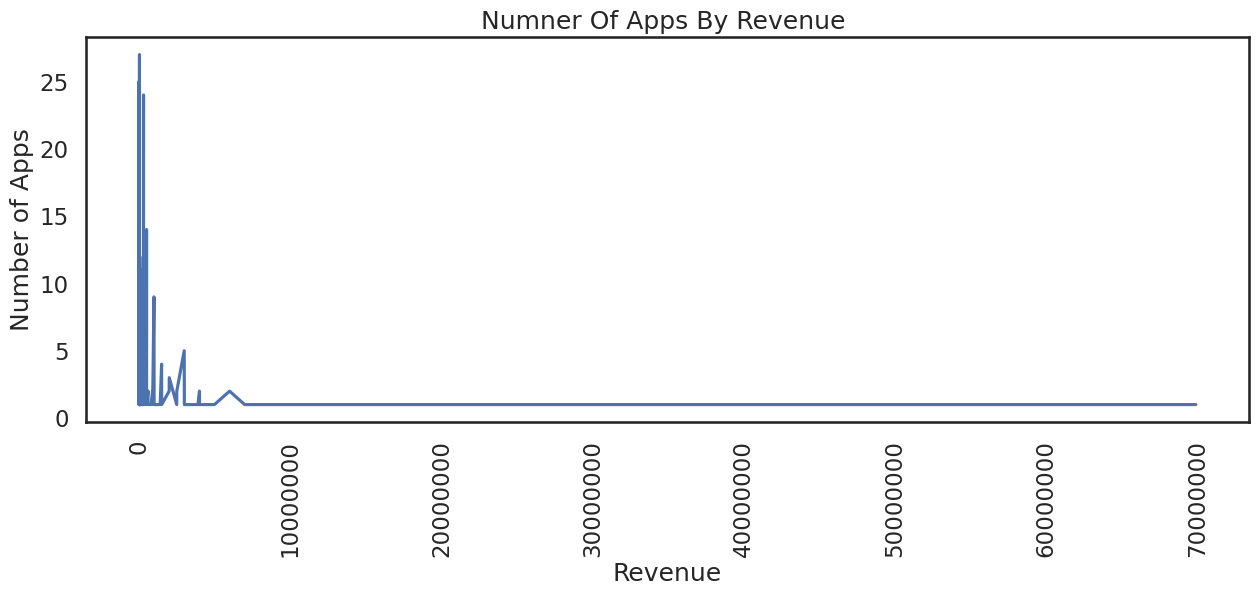

In [540]:
plt.figure(figsize=(15,5))
sns.set_theme(style="white", context="talk")
sns.lineplot(data=Apps_per_revenue2,  x=Apps_per_revenue2.index, y=Apps_per_revenue2['App'])
plt.title('numner of apps by revenue '.title())
plt.ylabel('Number of Apps')
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='x')
plt.show()

In [535]:
Apps_per_revenue2

,App
Revenue,
29900.000,27
990.000,25
299000.000,24
9.900,24
99.000,22


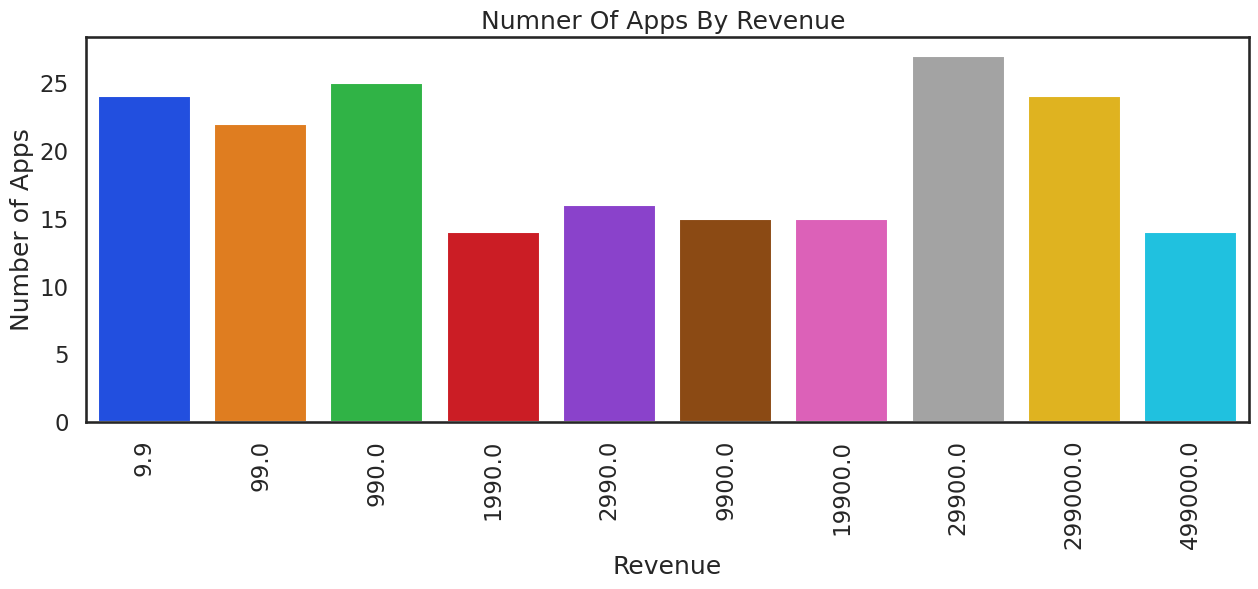

In [520]:
plt.figure(figsize=(15,5))
sns.set_theme(style="white", context="talk")
sns.barplot(data=Apps_per_revenue ,y=Apps_per_revenue['App'], x=Apps_per_revenue.index ,palette='bright')
plt.title('numner of apps by revenue '.title())
plt.ylabel('Number of Apps')
plt.xticks(rotation=90)
plt.show()

#### Looking at the highest revenues with the number of apps beeing genearted by them

In [419]:
High_revenue_apps =final_df.groupby('Revenue')['App'].count().to_frame().sort_index(ascending=False).head(10)

In [420]:
High_revenue_apps

,App
Revenue,
69900000.0,1
39999000.0,1
19999500.0,1
9900000.0,1
6990000.0,1
5990000.0,2
4990000.0,1
4000000.0,1
3999900.0,2


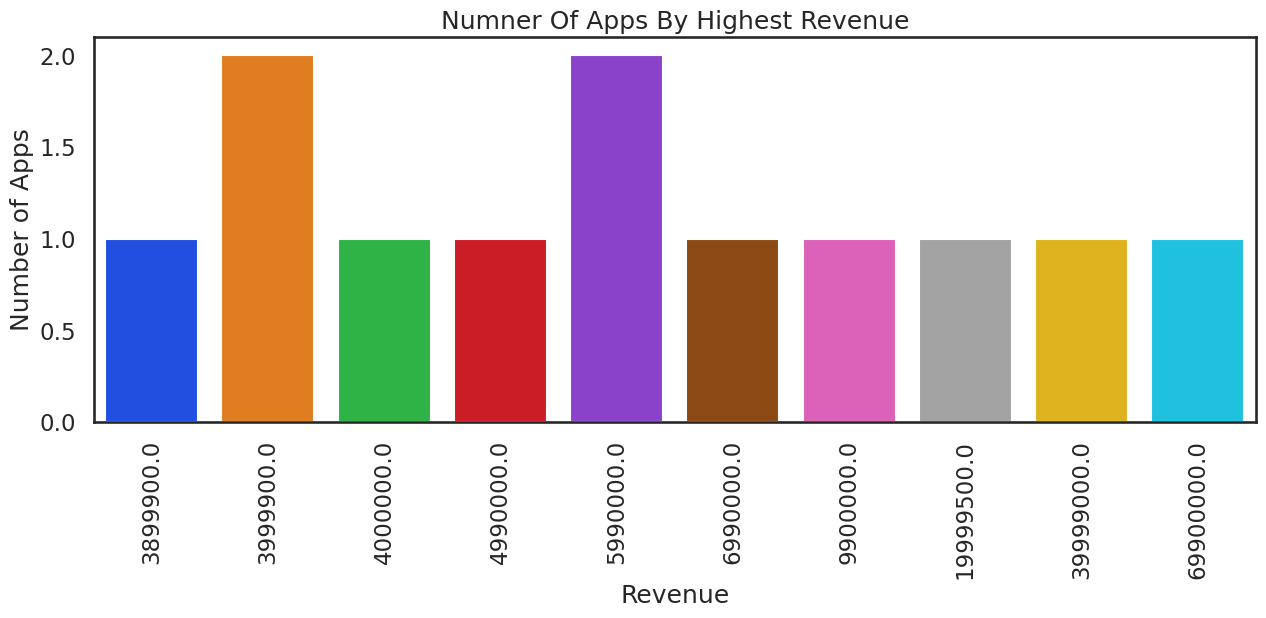

In [529]:
plt.figure(figsize=(15,5))
sns.set_theme(style="white", context="talk")
sns.barplot(data=High_revenue_apps ,y=High_revenue_apps['App'], x=High_revenue_apps.index ,palette='bright')
plt.title('numner of apps by highest revenue'.title())
plt.ylabel('Number of Apps')
plt.xticks(rotation=90)
plt.show()

### Looking at most prevalent categories

In [422]:
category1 = final_df.groupby('Category')['Revenue'].sum().to_frame()

In [423]:
#category1

In [424]:
category1 = category1.sort_values(by='Revenue').tail(10)

In [425]:
category1

,Revenue
Category,
PRODUCTIVITY,4.313375e+06
SPORTS,4.706212e+06
TOOLS,5.464821e+06
PERSONALIZATION,7.786948e+06
MEDICAL,8.456536e+06
PHOTOGRAPHY,8.942768e+06
FINANCE,2.572668e+07
GAME,4.098764e+07
LIFESTYLE,5.758394e+07


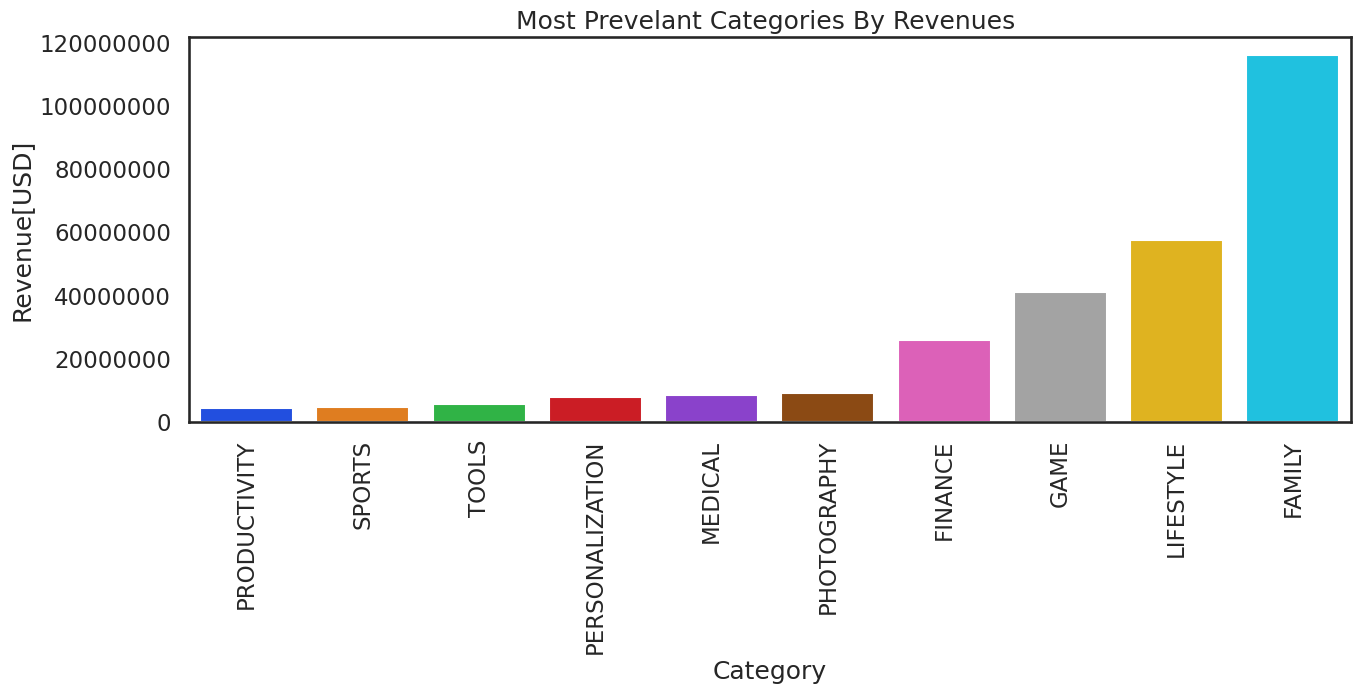

In [544]:
plt.figure(figsize=(15,5))
sns.set_theme(style="white", context="talk")
sns.barplot(data=category1 ,y=category1['Revenue'], x=category1.index ,palette='bright')
plt.title('Most prevelant Categories by revenues '.title())
plt.ylabel('Revenue[USD]')
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

### Looking at top apps by revenue and comparing them to the mean size

In [427]:
final_df.groupby('Size')['App'].count().to_frame()

,App
Size,
0.0,73
1.0,3
1.1,5
1.2,11
1.3,4
...,...
951.0,1
954.0,1
957.0,1


In [428]:
mean_size = final_df['Size'].mean()

In [429]:
size_exploration = final_df.copy()

In [430]:
size_exploration['Size'] = size_exploration['Size'].replace(0,mean_size)

In [431]:
mean_size

53.77905759162306

In [432]:
Apps_list =['Minecraft','I am rich','I Am Rich Premium','Hitman Sniper','Grand Theft Auto: San Andreas',
            'Sleep as Android Unlock','Facetune - For Free','DraStic DS Emulator','I\'m Rich-Trump Edition',
           '💎 I\'m rich','I am Rich Plus 	']

In [433]:
Top_apps_by_size = size_exploration.loc[size_exploration['App'].isin(Top_apps_by_revenues.App)]

In [458]:
Top_apps_by_size2 = df1.loc[df1['App'].isin(Top_apps_by_revenues.App)]

In [459]:
Top_apps_by_size2

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2241,Minecraft,FAMILY,4.500,2376564,Varies with device,"10,000,000+",Paid,$6.99,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device
2883,Facetune - For Free,PHOTOGRAPHY,4.400,49553,48M,"1,000,000+",Paid,$5.99,Everyone,Photography,"July 25, 2018",1.3.1,4.1 and up
4034,Hitman Sniper,GAME,4.600,408292,29M,"10,000,000+",Paid,$0.99,Mature 17+,Action,"July 12, 2018",1.7.110758,4.1 and up
4347,Minecraft,FAMILY,4.500,2375336,Varies with device,"10,000,000+",Paid,$6.99,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device
4367,I'm Rich - Trump Edition,LIFESTYLE,3.600,275,7.3M,"10,000+",Paid,$400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.800,3547,1.8M,"100,000+",Paid,$399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.000,856,8.7M,"10,000+",Paid,$399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5356,I Am Rich Premium,FINANCE,4.100,1867,4.7M,"50,000+",Paid,$399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5578,Sleep as Android Unlock,LIFESTYLE,4.500,23966,872k,"1,000,000+",Paid,$5.99,Everyone,Lifestyle,"June 27, 2018",20180608,4.0 and up
7417,Grand Theft Auto: San Andreas,GAME,4.400,348962,26M,"1,000,000+",Paid,$6.99,Mature 17+,Action,"March 21, 2015",1.08,3.0 and up


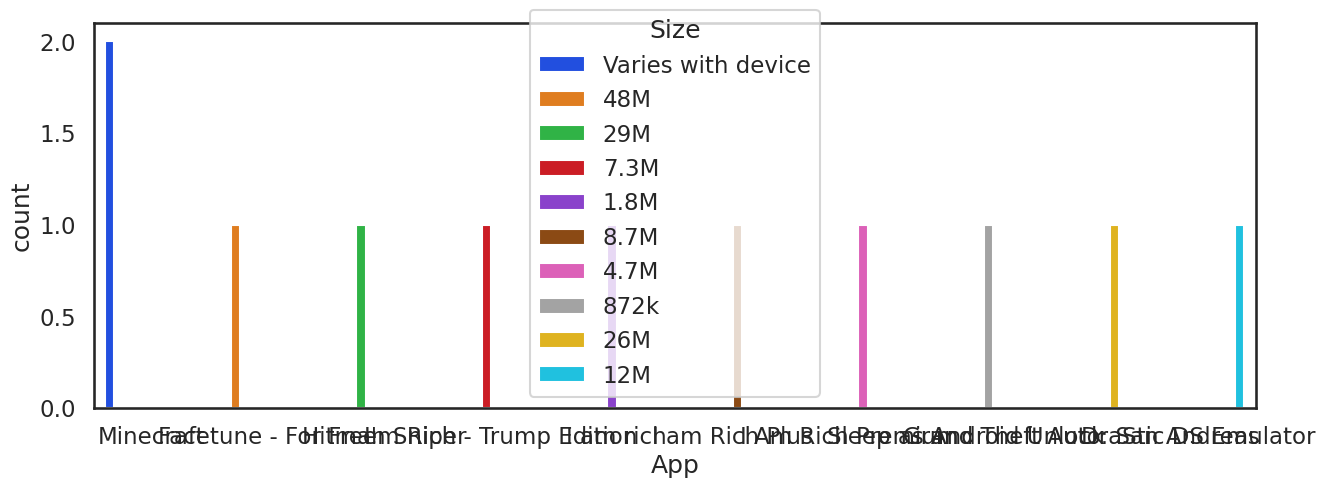

In [462]:
plt.figure(figsize=(15,5))
sns.countplot(data=Top_apps_by_size2, x=Top_apps_by_size2['App'], hue='Size',
               palette='bright')#, y=Gym_Gold['Medal'])
plt.show()

In [460]:
plt.figure(figsize=(15,5))
sns.set_theme(style="white", context="talk")
sns.barplot(data=Top_apps_by_size2 ,x=Top_apps_by_size2['App'], y=Top_apps_by_size2['Size'] ,)
plt.title('Most  Categories by installs -Free '.title())
plt.xticks(rotation=90)
plt.show()

TypeError: Neither the `x` nor `y` variable appears to be numeric.

<Figure size 1500x500 with 0 Axes>

In [63]:
a = df.loc[2,'Size'].replace('M',"")

In [67]:
a = float(a)

In [68]:
type(a)

float

19M
14M
8.7M
25M
2.8M
5.6M
19M
29M
33M
3.1M
28M
12M
20M
21M
37M
2.7M
5.5M
17M
39M
31M
14M
12M
4.2M
7.0M
23M
6.0M
25M
6.1M
4.6M
4.2M
9.2M
5.2M
11M
11M
4.2M
9.2M
24M
Varies with device
11M
9.4M
15M
10M
Varies with device
1.2M
12M
24M
26M
8.0M
7.9M
25M
56M
57M
Varies with device
35M
33M
33M
5.6M
54M
201k
3.6M
5.7M
17M
8.6M
2.4M
27M
2.7M
2.5M
Varies with device
Varies with device
7.0M
35M
16M
16M
Varies with device
17M
3.4M
8.9M
3.9M
2.9M
38M
32M
37M
15M
5.4M
18M
Varies with device
38M
1.1M
Varies with device
Varies with device
7.9M
35M
Varies with device
17M
19M
14M
2.2M
4.5M
17M
14M
9.8M
21M
Varies with device
52M
14M
25M
9.0M
Varies with device
12M
Varies with device
35M
6.7M
30M
5.7M
2.9M
17M
2.9M
Varies with device
Varies with device
2.6M
4.2M
7.1M
57M
3.7M
22M
24M
7.4M
21M
3.4M
2.9M
3.1M
6.4M
3.2M
8.2M
9.9M
2.9M
23M
4.6M
3.1M
Varies with device
4.9M
9.5M
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
4.2M
5.4M
Varies with device
2.8M
5.

In [77]:
a

'Varies with device'